## Preliminares

La siguiente celda contiene todas las funciones necesarias para ejecutar el resto del cuaderno. Debes ejecutarla siempre en primer lugar

In [28]:
from numpy import *
import matplotlib.pyplot as plt

# impresión de resultados
"""
printSoln(X,Y,freq,[exact]).
Imprime los valores de X e Y cada 'freq' pasos
freq = n imprime cada n pasos
freq = 0 imprime solo el paso final (por defecto)
Imprime (opcionalmente) el error entre la solución 
exacta (exact) y la calculada (Y)
Retorna (opcionalmente) el máximo valor absoluto del error
"""
def printSoln(X, Y, freq=0, exact = []):
    # imprime cabecera
    def printHead(n):
        print("\n", end="")
        print("{:^17}".format('x'), end="")
        if n == 1:
            print("{:^17}".format("y"), end="")
        else:
            for i in range (n):
                print("{:^17}".format("y[{}]".format(i)), end="")
        if len(exact):
            print("{:^16}".format("Error"),end="")
        print()
    # impresión línea a línea
    def printLine(x,y,n,z = None):
        print("{:16.10f}".format(x),end="")
        for i in range (n):
            print("{:16.10f}".format(y[i]),end="")
        if z != None:
            print("{:16.10f}".format(z),end="")
        print()
    m = len(Y)
    try: 
        n = len(Y[0])
    except TypeError: 
        n = 1
    if freq == 0: 
        freq = m
    printHead(n)
    if len(exact):
        exact = abs(exact-Y[:,0])
        ret = exact.max()
    else:
        exact = m*[None]
        ret = None
    for i in range(0,m,freq):
            printLine(X[i],Y[i],n,exact[i])
    if i != m - 1: 
        printLine(X[m - 1],Y[m - 1],n,exact[m-1])
    return ret

# solución de una ecuación o sistema
""" 
X,Y = edosolver(F,x,y,xStop,h,method=metodo).
Resolución de un problema de valores iniciales y' = F(x,y), donde
y = (y[0],y[1],...y[n-1]).
    x,y = condiciones iniciales
    xStop = valor final para x
    h = paso de integración
    F = función escrita por el usuario que retorna un 
    array F(x,y) = (y'[0],y'[1],...,y'[n-1]).
    metodo = "Euler" (defecto), "EulerM", "medioPaso", "RK"
"""
def edosolver(F, x, y0, xStop = 1., h = 0.1, method = "Euler"):
    def Euler(F,x,y,h):
        return y + h*F(x,y)
    def EulerM(F,x,y,h):
        return y + h/2*( F(x,y) + F(x+h,y+h*F(x,y)))
    def medioPaso(F,x,y,h):
        return y + h*(F(x+h/2, y + h/2*F(x,y)))
    def RK(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x + h/2, y + K0/2)
        K2 = h*F(x + h/2, y + K1/2)
        K3 = h*F(x + h, y + K2)
        return  y + (K0 + 2*K1 + 2*K2 + K3)/6.0
    if not type(y0) is list:
        y = array([y0])
    else:
        y = array(y0)
    if x >= xStop:
        print("Error: no hay intervalo. Calculando en (0,1)")
        x = 0.
        xStop = 1.
    metodo = locals()[method]
    
    X = arange(x,xStop+h,h)
    Y = zeros((X.shape[0],y.shape[0]))
    Y[0,:] = y
    for i in range(X.shape[0]-1):
        Y[i+1,:] = metodo(F,X[i],Y[i,:],h)
    return X,Y



# dibujo de resultados
"""
dibujar(X,Y,[yExact])
Dibuja la solución la primera componente de la 
solución del sistema, o la solución de la edo
Dibuja opcionalmente la solución exacta
"""
def dibujar(X,*Y):
    if len(Y)>1:
        for i in range(len(Y)-1):
            plt.plot(X,Y[i][:,0],'o',label="Num "+str(i+1))
        plt.plot(X,Y[len(Y)-1],'-',label="Exacta")
        plt.legend(('Numerica','Exacta'),loc=0)
    else:
        plt.plot(X,Y[0][:,0],'-o',label = "Numérica")
    plt.legend(loc=0)
    plt.xlabel('x'); plt.ylabel('y')


## Planteamiento del problema

Para resolver un problema de valores iniciales para una ecuación o sistema diferencial, hemos de escribir la ecuación o sistema en la forma $$y'=f(x,y),\quad y(x_0)=y_0$$
e identificar la función $f$, y los valores $x_0$ e $y_0$. Eventualmente, estas funciones y valores pueden ser vectoriales. Las ecuaciones de orden superior han de transformarse en un sistema de primer orden.

### Ejemplo 1:
Resolver el problema de valor inicial: $$y' = -xy,\quad y(0) = 1$$
en el intervalo $[0,1]$

Comenzamos definiendo la función $f(x,y)$:

In [29]:
def F(x,y):
    F = -x*y
    return F

Definimos el resto de datos: punto inicial $x_0$, dato inicial $y_0$, instante final $x_T$ (nótese que la ecuación se resolverán en el intervalo $[x_0,x_T]$), y el tamaño de paso $h$

In [30]:
x0 = 0.
xStop = 1.
y0 = 1.0
h = 0.1

Empleamos el método de Euler usando la función `euler`

In [31]:
X, Y = edosolver(F,x0,y0,xStop,h)

Obtenemos resultados y dibujamos la solución obtenida y la solución exacta

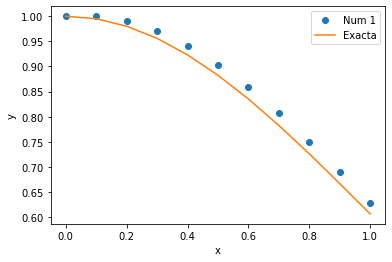

In [32]:
yExact = exp(-X**2/2)
dibujar(X,Y,yExact)

Impresión de valores de la solución en el punto inicial y final:

In [33]:
printSoln(X,Y)


        x                y        
    0.0000000000    1.0000000000
    1.0000000000    0.6281565096


También se puede imprimir el error en valor absoluto respecto de la solución exacta, cada cierto número de valores. En este caso, la función devuelve el máximo error.

In [34]:
printSoln(X,Y,0,yExact)


        x                y             Error      
    0.0000000000    1.0000000000    0.0000000000
    1.0000000000    0.6281565096    0.0216258498


0.024157352743909177

O en todos los puntos:

In [35]:
printSoln(X,Y,1,yExact)


        x                y             Error      
    0.0000000000    1.0000000000    0.0000000000
    0.1000000000    1.0000000000    0.0049875208
    0.2000000000    0.9900000000    0.0098013267
    0.3000000000    0.9702000000    0.0142025182
    0.4000000000    0.9410940000    0.0179776536
    0.5000000000    0.9034502400    0.0209533374
    0.6000000000    0.8582777280    0.0230075166
    0.7000000000    0.8067810643    0.0240765261
    0.8000000000    0.7503063898    0.0241573527
    0.9000000000    0.6902818786    0.0233050678
    1.0000000000    0.6281565096    0.0216258498


0.024157352743909177

### Ejemplo 2
Resolver la ecuación $$y'' + 0.1y' = -x, \quad y(0)=0,\ y'(0)=1$$
en el intervalo $[0,4]$.

Para ello hemos de convertir la ecuación en un sistema. Haciendo $y_1 = y$, $y_2 = y_1'$, 
$$\left\{ \begin{array}{l} y_1'  = y_2 \\ y_2'  = -0.1y_2 - x\end{array}\right.\quad \mbox{con }y_1(0)=0,\ y_2(0)=1$$


        x              y[0]             y[1]            Error      
    0.0000000000    0.0000000000    1.0000000000    0.0000000000
    4.0000000000   -3.2137730238   -5.6786226976    3.1693814009


3.1693814008889523

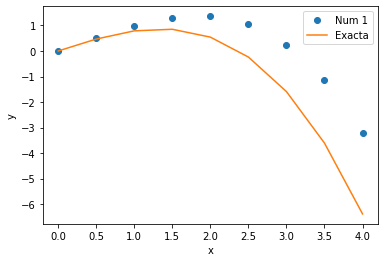

In [47]:
def F(x,y):
    F = zeros(2) # definición de vector de 2 componentes
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

# Instante inicial
x0 = 0.0
# Instante final
xStop = 4.0 
# Valores iniciales
y0 = [0.0, 1.0]
# Tamaño del paso
h = 0.5

# solución mediante el método de Euler
X,Y = edosolver(F,x0,y0,xStop,h,"Euler")

# Solución exacta
yExact = 100.0*X - 5.0*X**2 + 990.0*(exp(-0.1*X) - 1.0)

dibujar(X,Y,yExact)
printSoln(X,Y,0,yExact)

Comparamos con otros métodos:

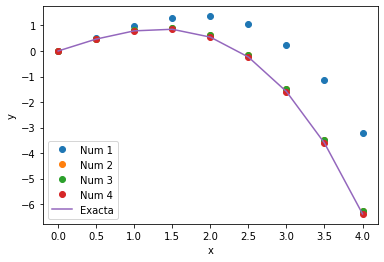

In [49]:
X, Y2 = edosolver(F,x0,y0,xStop,h,method='EulerM')
X, Y3 = edosolver(F,x0,y0,xStop,h,method='medioPaso')
X, Y4 = edosolver(F,x0,y0,xStop,h,method='RK')
dibujar(X,Y,Y2,Y3,Y4,yExact)

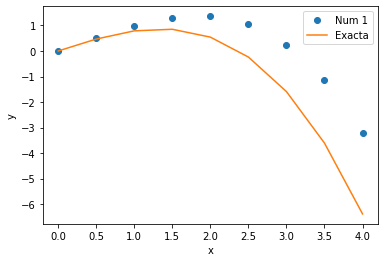

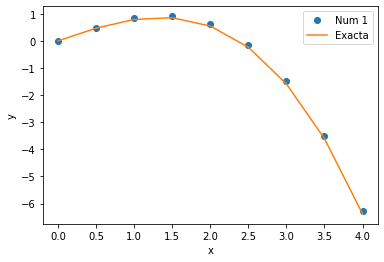

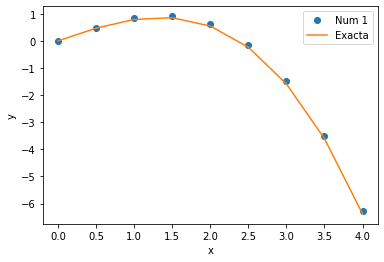

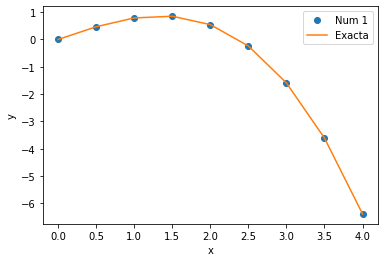

In [50]:
plt.figure(1)
dibujar(X,Y,yExact)
plt.figure(2)
dibujar(X,Y2,yExact)
plt.figure(3)
dibujar(X,Y3,yExact)
plt.figure(4)
dibujar(X,Y4,yExact)

#### Ejemplo de problema rígido
$$\begin{array}{l}
y_1' = -16y_1 +12y_2 + 16\cos(x)-13\sin(x) \\
y_2' = 12y_1 - 9y_2 -11\cos(x) + 9\sin(x)\end{array}\quad y_1(0)=1,\ y_2(0)=0$$


        x              y[0]             y[1]            Error      
    0.0000000000    1.0000000000    0.0000000000    0.0000000000
    3.1415926536-1736.0677677070 1301.3008256503 1735.0677677070


1735.0677677070348

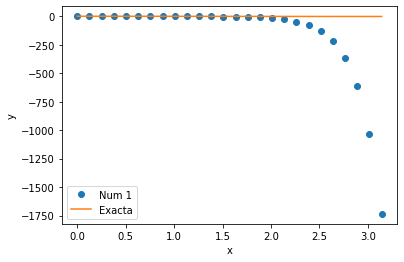

In [39]:
def F(x,y):
    F = zeros(2) # definición de vector de 2 componentes
    F[0] = -16*y[0] +12*y[1] +16*cos(x) - 13*sin(x)
    F[1] = 12*y[0] -9*y[1] -11*cos(x) + 9*sin(x)
    return F

# Instante inicial
x0 = 0.0
# Instante final
xStop = pi 
# Valores iniciales
y0 = [1.0, 0.0]

# Tamaño del paso
n = 25
h = pi/n
# solución mediante el método de Euler
X,Y = edosolver(F,x0,y0,xStop,h,"RK")

# Solución exacta
yExact = cos(X)

dibujar(X,Y,yExact)
printSoln(X,Y,0,yExact)